This script is to determine celltype-expressed genes solely based on Barres mouse expression data. I.e., any gene with FPKM greater than 1 is counted as "expressed" for that cell type. 

In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.max_rows', 10)

In [4]:
# Import expression level data
raw_df=pd.read_csv('../results/mouse.celltype-expression.tsv',sep='\t',index_col='Gene symbol')

In [5]:
raw_df

,Neuron,Endothelial Cells,Oligodendrocyte,Astrocytes,Microglia,Glial Cells
Gene symbol,,,,,,
0610005C13Rik,0.100000,0.100000,0.100000,0.150958,0.100000,0.116986
0610007C21Rik,34.185493,63.561108,61.071109,44.891260,89.145033,65.035801
0610007L01Rik,12.028727,13.521373,11.161263,11.015039,18.462418,13.546240
0610007P08Rik,2.020408,4.693264,4.455001,7.144110,0.446900,4.015337
0610007P14Rik,24.370482,10.569456,62.335636,48.935667,10.411304,40.560869
...,...,...,...,...,...,...
Zyg11a,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Zyg11b,14.748427,7.883384,5.880200,7.196140,2.513958,5.196766
Zyx,12.732355,35.416643,17.037024,12.443373,74.185894,34.555430


In [6]:
# define celltype-expressed genes--astrocyte, neuron, microglia, endothelial cells, oligodendrocyte, glial cells (general)
a_df = raw_df.loc[raw_df['Astrocytes']>1].copy(deep=True)
n_df = raw_df.loc[raw_df['Neuron']>1].copy(deep=True)
m_df = raw_df.loc[raw_df['Microglia']>1].copy(deep=True)
e_df = raw_df.loc[raw_df['Endothelial Cells']>1].copy(deep=True)
o_df = raw_df.loc[raw_df['Oligodendrocyte']>1].copy(deep=True)
g_df = raw_df.loc[raw_df['Glial Cells']>1].copy(deep=True)

In [7]:
# Output list of astrocyte-specific genes
MyFile=open('../results/mouse.celltype-expressed_genes/all_barres/astrocyte.list.txt','w')
MyList=map(lambda x:x+'\n', a_df.index.to_list())
MyFile.writelines(MyList)
MyFile.close()

In [8]:
# Output list of neuron-specific genes
MyFile=open('../results/mouse.celltype-expressed_genes/all_barres/neuron.list.txt','w')
MyList=map(lambda x:x+'\n', n_df.index.to_list())
MyFile.writelines(MyList)
MyFile.close()

In [9]:
# Output list of microglia-specific genes
MyFile=open('../results/mouse.celltype-expressed_genes/all_barres/microglia.list.txt','w')
MyList=map(lambda x:x+'\n', m_df.index.to_list())
MyFile.writelines(MyList)
MyFile.close()

In [10]:
# Output list of endothelia-specific genes
MyFile=open('../results/mouse.celltype-expressed_genes/all_barres/endothelia.list.txt','w')
MyList=map(lambda x:x+'\n', e_df.index.to_list())
MyFile.writelines(MyList)
MyFile.close()

In [11]:
# Output list of oligodendrocyte-specific genes
MyFile=open('../results/mouse.celltype-expressed_genes/all_barres/oligodendrocyte.list.txt','w')
MyList=map(lambda x:x+'\n', o_df.index.to_list())
MyFile.writelines(MyList)
MyFile.close()

In [12]:
# Output list of glia-specific genes
MyFile=open('../results/mouse.celltype-expressed_genes/all_barres/glia.list.txt','w')
MyList=map(lambda x:x+'\n', g_df.index.to_list())
MyFile.writelines(MyList)
MyFile.close()

### Visualize overlap between glial cell-specific genes and subtypes

Figures saved to figures/Venn_Diagrams/all_barres-celltype-expressed

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [16]:
import matplotlib
matplotlib.rcParams['figure.dpi']= 300

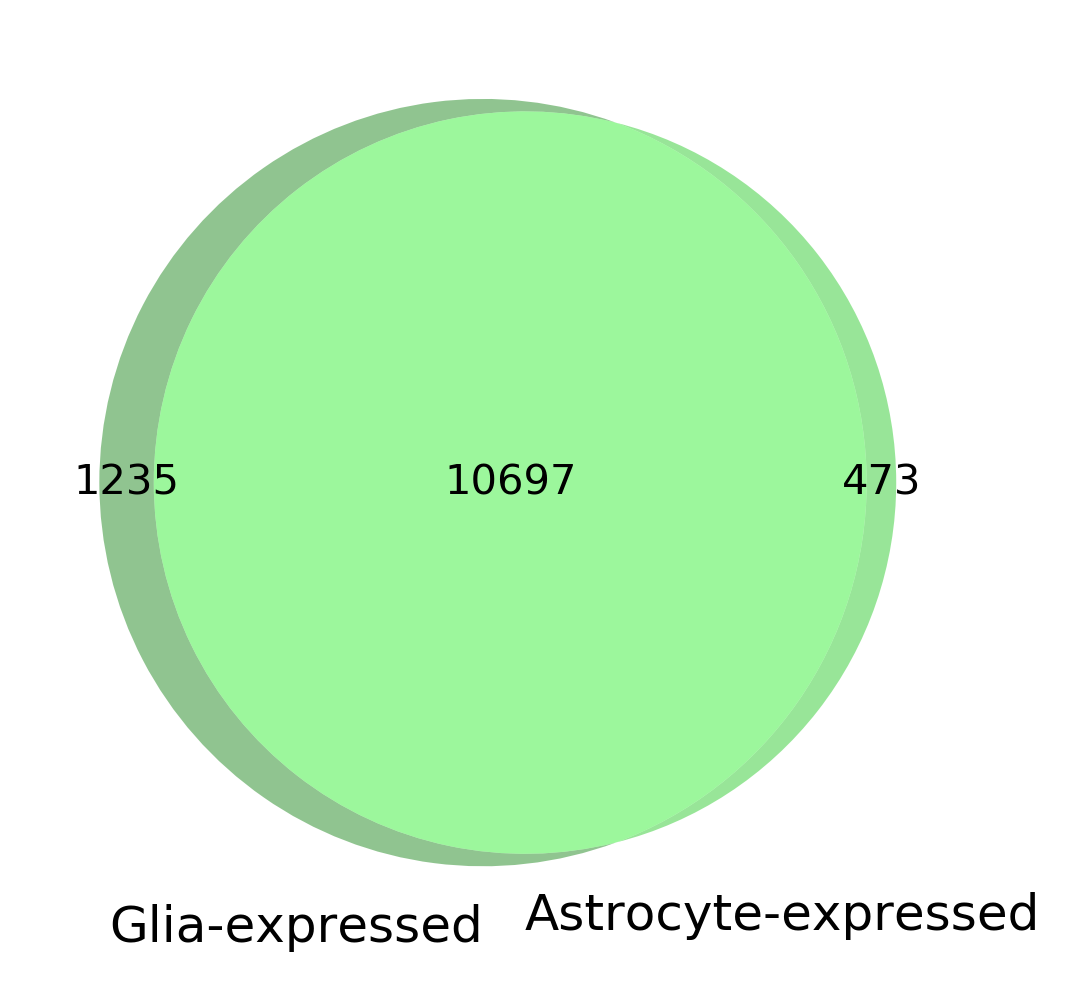

In [20]:
venn2([set(g_df.index.to_list()), set(a_df.index.to_list())],set_labels = ('Glia-expressed', 'Astrocyte-expressed'), set_colors=('forestgreen','limegreen'), alpha=0.5)

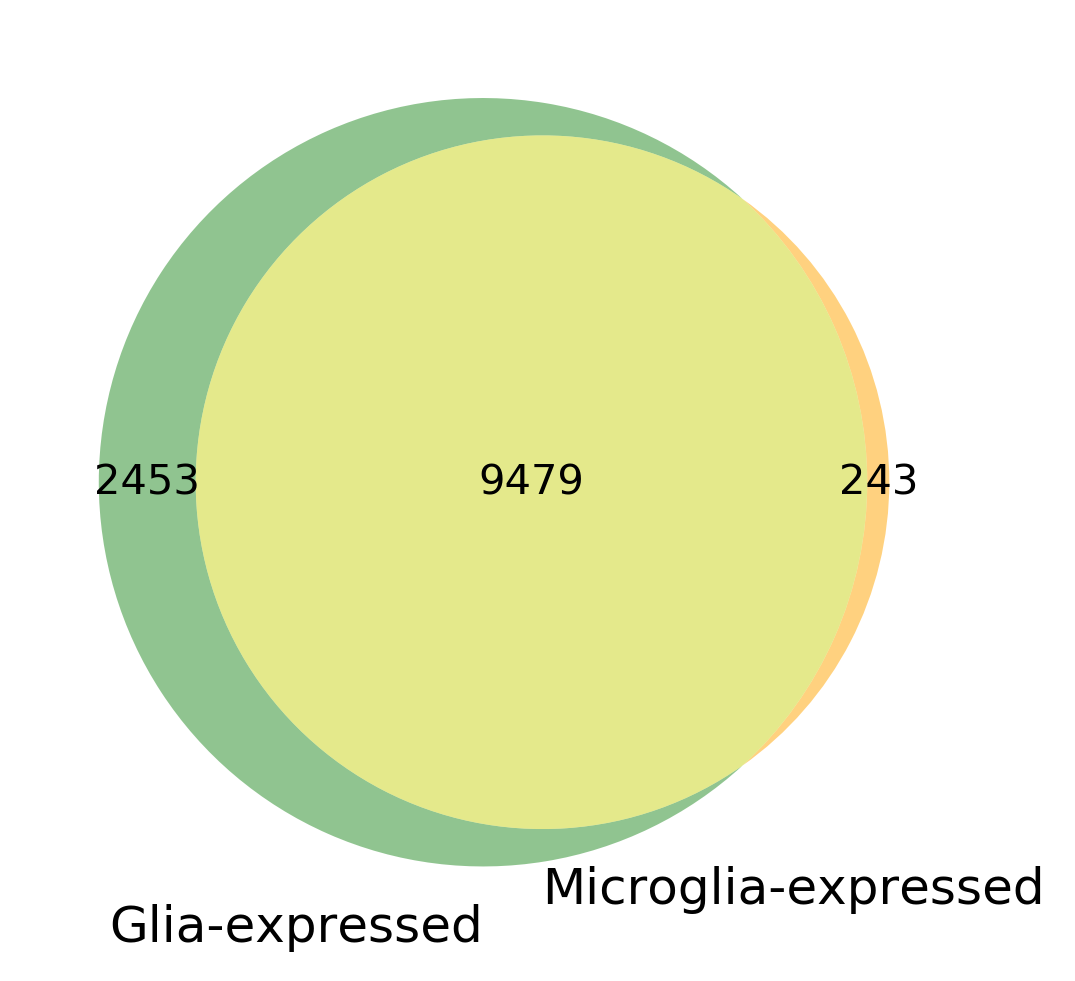

In [22]:
venn2([set(g_df.index.to_list()), set(m_df.index.to_list())],set_labels = ('Glia-expressed', 'Microglia-expressed'), set_colors=('forestgreen','orange'), alpha=0.5)

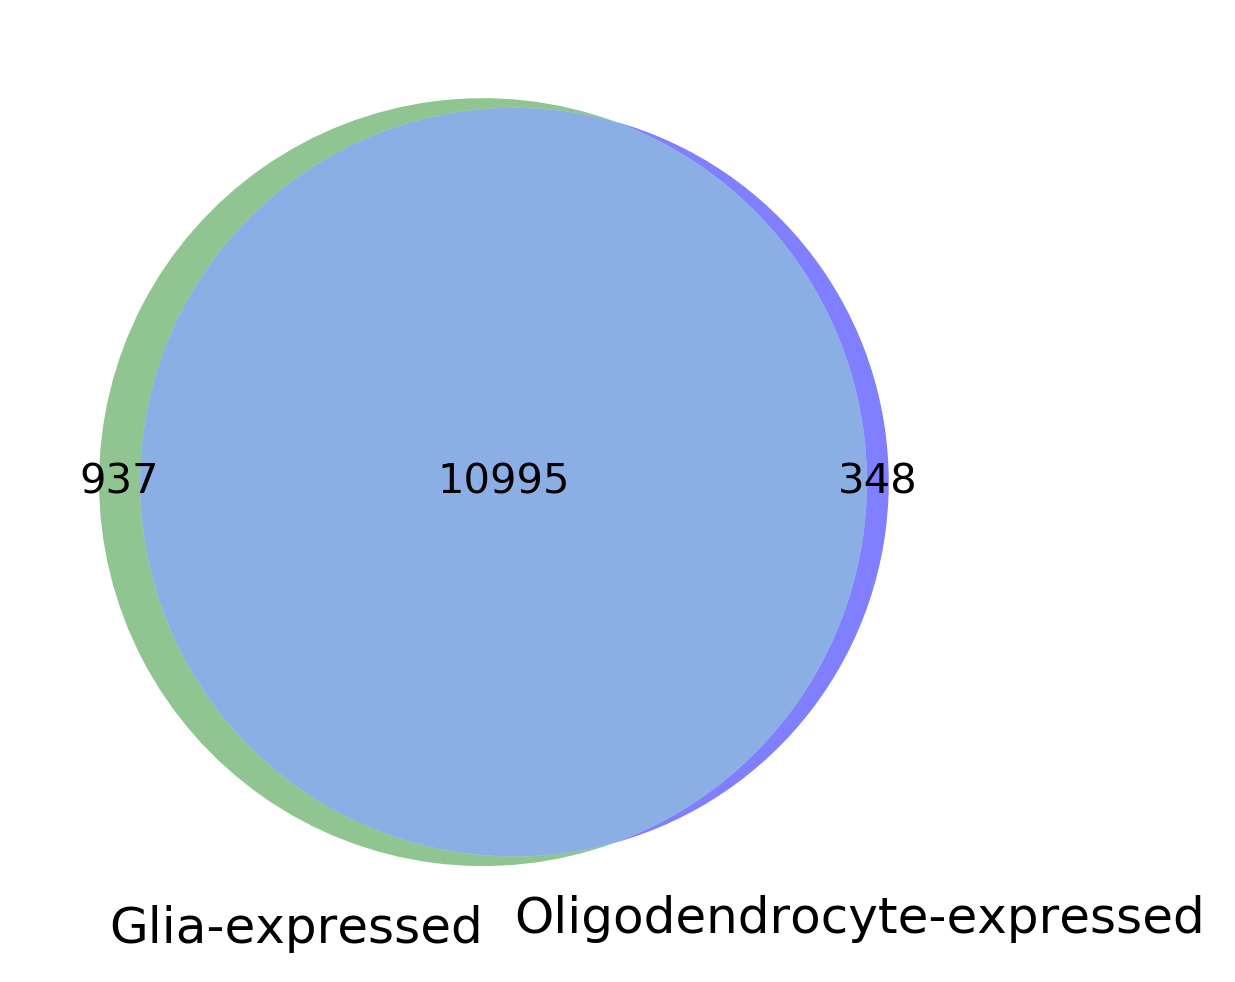

In [23]:
venn2([set(g_df.index.to_list()), set(o_df.index.to_list())],set_labels = ('Glia-expressed', 'Oligodendrocyte-expressed'), set_colors=('forestgreen','blue'), alpha=0.5)

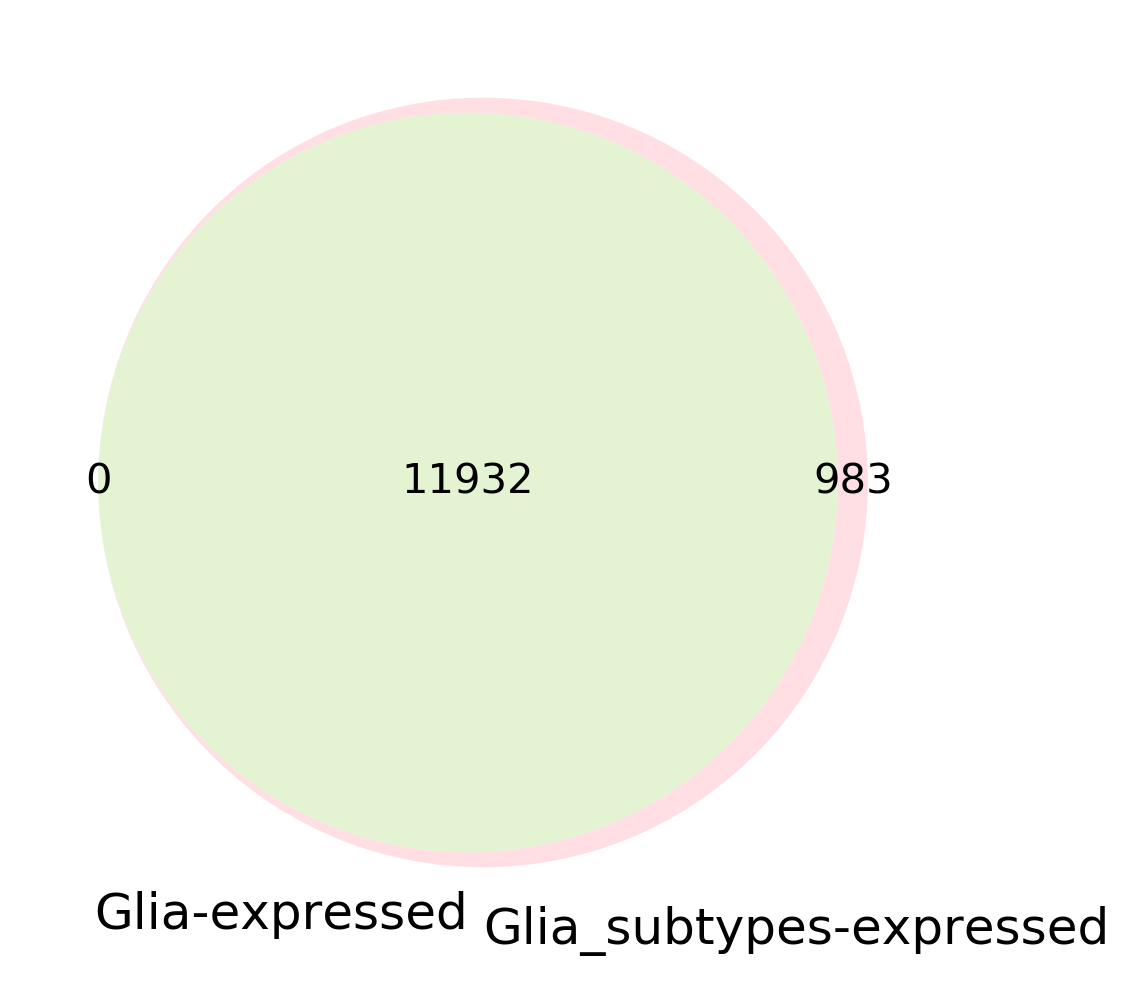

In [24]:
venn2([set(g_df.index.to_list()), set(o_df.index.to_list()+m_df.index.to_list()+a_df.index.to_list())],set_labels = ('Glia-expressed', 'Glia_subtypes-expressed'), set_colors=('forestgreen','pink'), alpha=0.5)

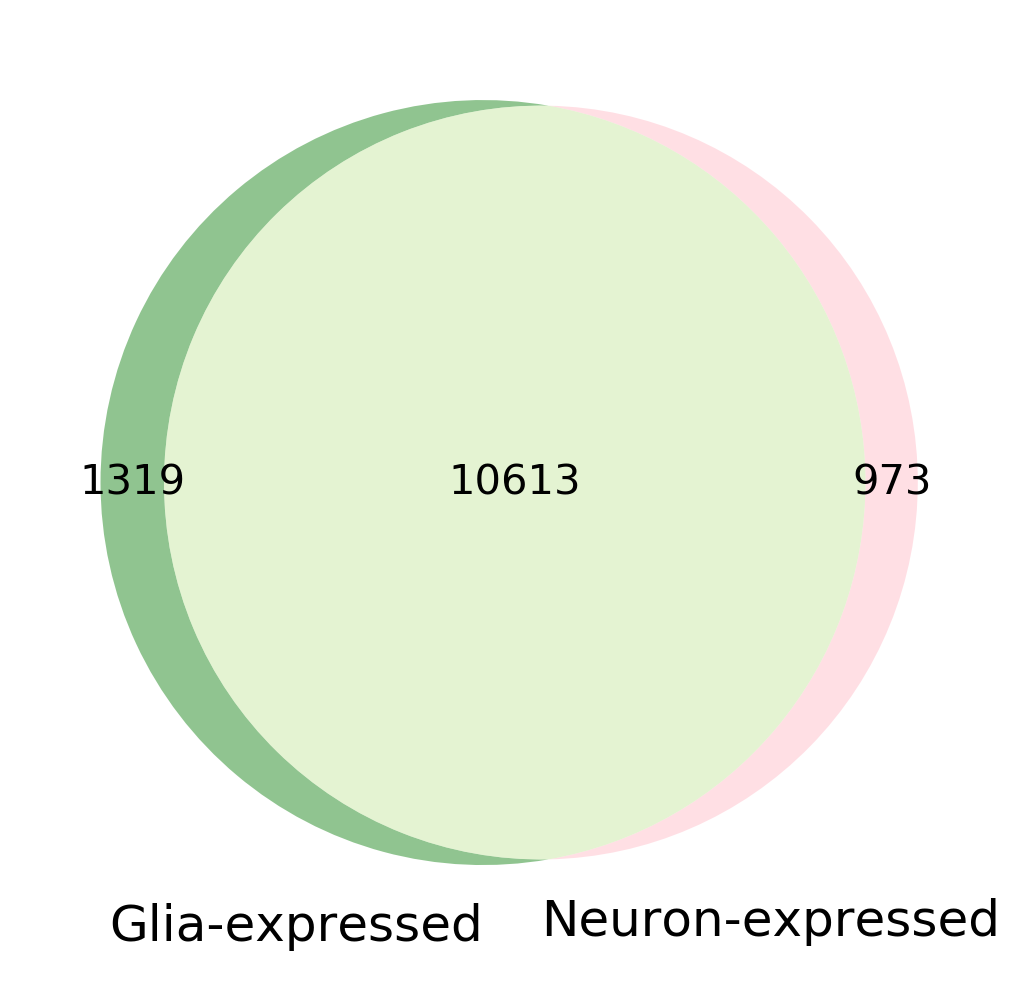

In [28]:
venn2([set(g_df.index.to_list()), set(n_df.index.to_list())],set_labels = ('Glia-expressed', 'Neuron-expressed'), set_colors=('forestgreen','pink'), alpha=0.5)

In [25]:
from matplotlib_venn import venn3

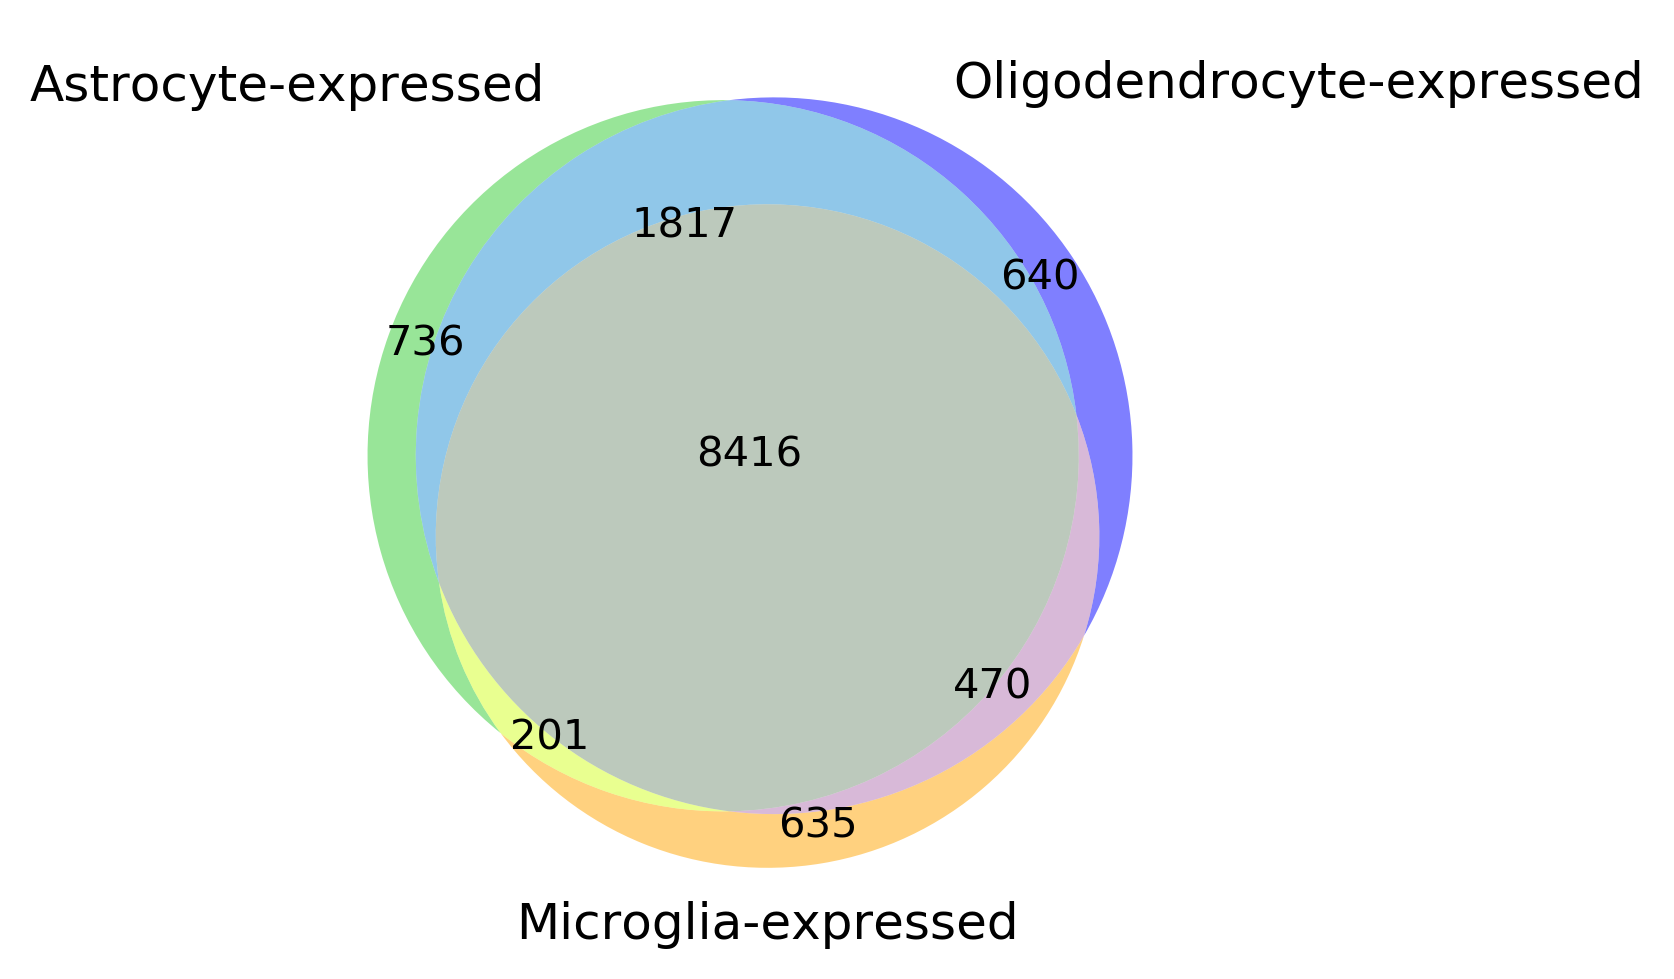

In [26]:
# Showing ther overlap between the three glia subtypes
venn3([set(a_df.index.to_list()), set(o_df.index.to_list()), set(m_df.index.to_list())],set_labels = ('Astrocyte-expressed', 'Oligodendrocyte-expressed', 'Microglia-expressed'), set_colors=('limegreen','blue','orange'), alpha=0.5)

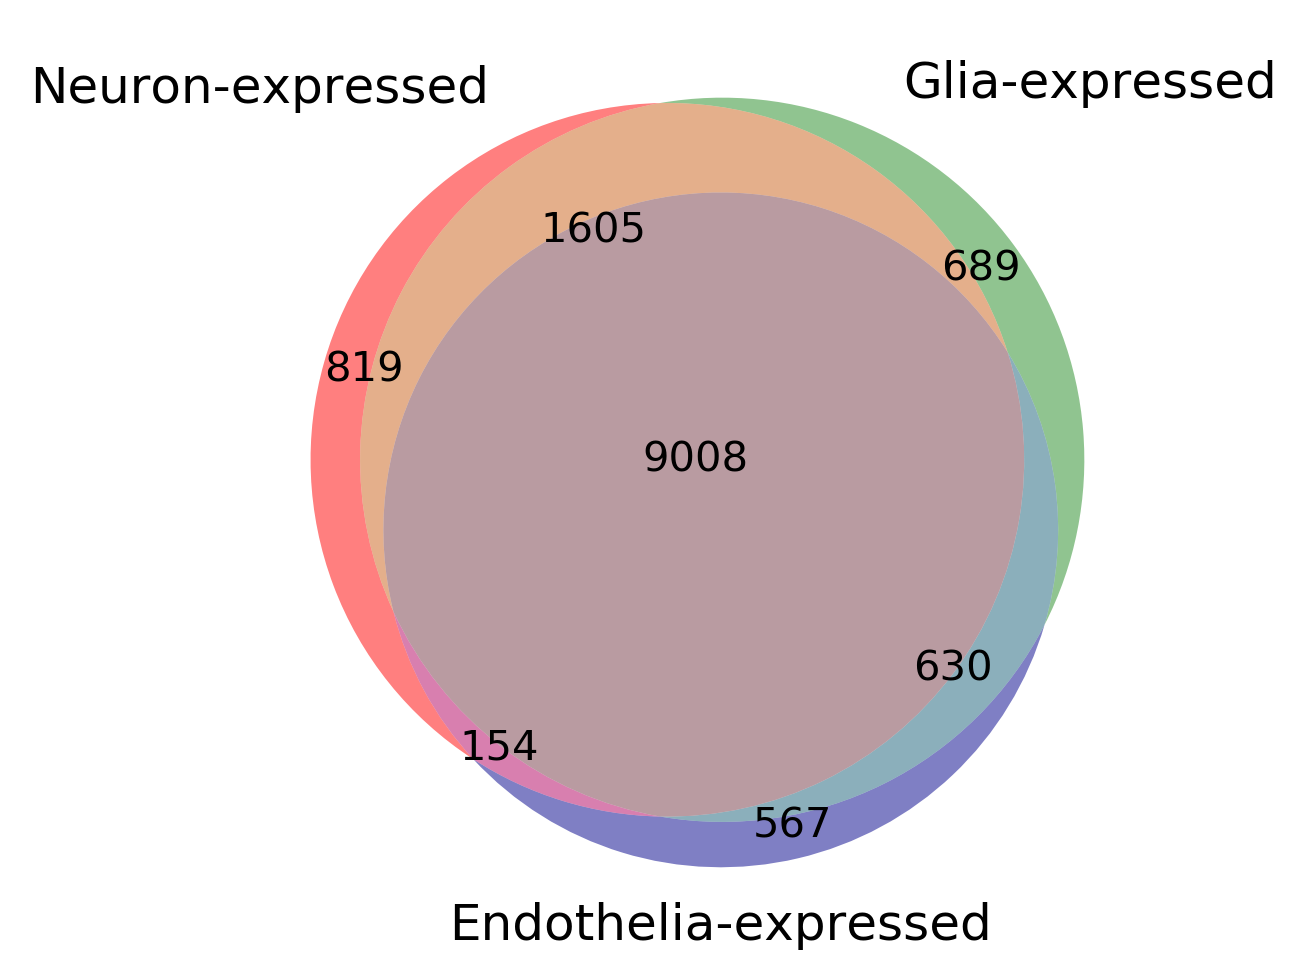

In [27]:
# Showing the overlap between the three glia subtypes
venn3([set(n_df.index.to_list()), set(g_df.index.to_list()), set(e_df.index.to_list())],set_labels = ('Neuron-expressed', 'Glia-expressed', 'Endothelia-expressed'), set_colors=('red','forestgreen','darkblue'), alpha=0.5)